In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import explore
import prepare

from sklearn.impute import SimpleImputer

## Acquire & Summarize

#### 1.) Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.
    - a.)Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - b.)Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    - c.) Only include properties that include a latitude and longitude value.

NameError: name 'zillow_df' is not defined

-----------------------------

In [5]:
zillow_df = acquire.zillow_data_all()

In [10]:
#initial shape of dataframe
zillow_df.shape

(77574, 14)

In [11]:
## making minor changes before prep.
zillow_df = zillow_df.loc[:, ~zillow_df.columns.duplicated()]
zillow_df.shape

(77574, 13)

#### 2.) Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [12]:
prepare.summarize(zillow_df)

Dataframe head: 
           bathroomcnt           bedroomcnt    calculatedbathnbr  \
0                 3.50                 4.00                 3.50   
1                 1.00                 2.00                 1.00   
2                 2.00                 3.00                 2.00   
3                 3.00                 4.00                 3.00   
4                 3.00                 3.00                 3.00   
5                 2.00                 3.00                 2.00   
6                 3.00                 4.00                 3.00   
7                 1.00                 2.00                 1.00   
8                 3.00                 4.00                 3.00   
9                 3.00                 2.00                 3.00   

   calculatedfinishedsquarefeet    lotsizesquarefeet  propertylandusetypeid  \
0                      3,100.00             4,506.00                 261.00   
1                      1,465.00            12,647.00                 261.00 

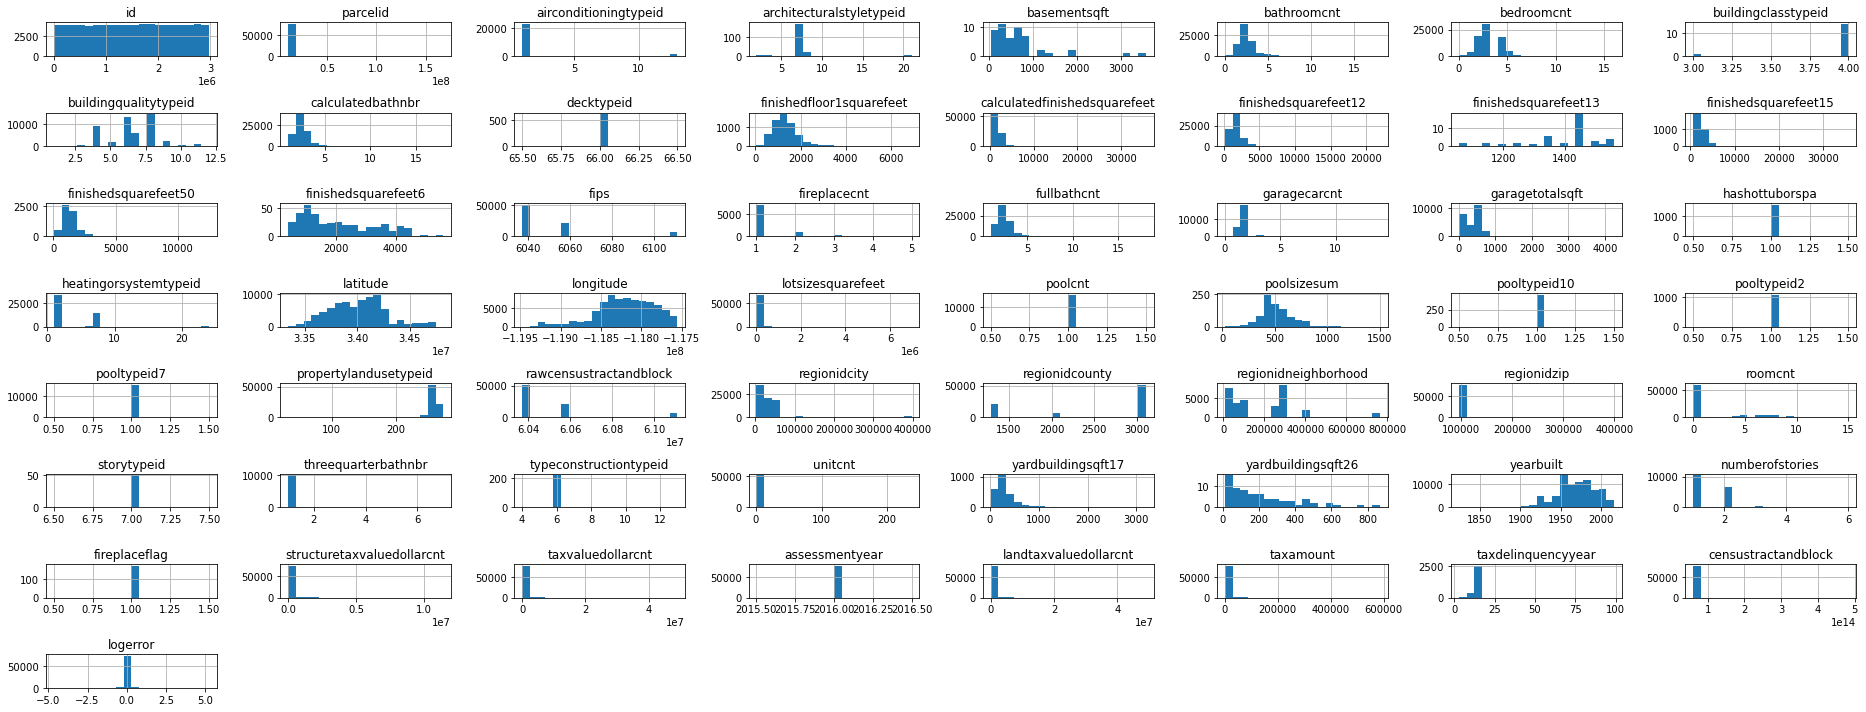

In [6]:
zillow_df.hist(figsize=(26, 10), bins=20)
plt.tight_layout()
plt.show()

#### 3.) Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
explore.miss_dup_values(zillow_df)

Your selected dataframe has 68 columns.
There are 52 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
buildingclasstypeid,77559,100.00
buildingclassdesc,77559,100.00
finishedsquarefeet13,77532,99.90
basementsqft,77524,99.90
storydesc,77524,99.90
storytypeid,77524,99.90
yardbuildingsqft26,77504,99.90
fireplaceflag,77402,99.80
architecturalstyledesc,77368,99.70
architecturalstyletypeid,77368,99.70


### 4.) Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [8]:
def nulls_by_col(df):
    '''
    take in a dataframe 
    return a dataframe with each column name as a row
    each row will show the number and percent of nulls in the column.
    '''
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    percent_missing = num_missing / rows * 100
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'percent_rows_missing':percent_missing})
    # col by col assessment.
    return cols_missing

In [9]:
nulls_by_col(zillow_df)

,num_rows_missing,percent_rows_missing
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52568,67.76
architecturalstyletypeid,77368,99.73
basementsqft,77524,99.94
bathroomcnt,0,0.00
bedroomcnt,0,0.00
buildingclasstypeid,77559,99.98
buildingqualitytypeid,27766,35.79
calculatedbathnbr,615,0.79


### Takeaways:
- column have large;y varied number of nulls
- drop those with less than half nulls

# Prepare:

-----------------------------

#### 1.) Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.



In [10]:
zillow_df = zillow_df.drop(zillow_df[zillow_df.propertylandusetypeid.isin([246, 247, 248, 260,266, 267, 269, 270, 271, 290, 291])].index)
zillow_df.head()



,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,1727539,14297519,nan,nan,nan,3.50,4.00,nan,nan,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None,None,None,None,None,None
1,1387261,17052889,nan,nan,nan,1.00,2.00,nan,nan,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None,None,None,None,None,None
2,11677,14186244,nan,nan,nan,2.00,3.00,nan,nan,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None,None,None,None,None,None
3,2288172,12177905,nan,nan,nan,3.00,4.00,nan,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,None,None,None,Central,None,None
6,781532,12095076,1.00,nan,nan,3.00,4.00,nan,9.00,3.00,...,"60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential,Central,None,None,Central,None,None


In [11]:
zillow_df.shape

(52927, 68)

#### 2.) Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input: 
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    - hint:
        -Look up the dropna documentation.
        -You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.





In [12]:
def remove_outliers(df, k, col_list):
    '''
    remove outliers from a list of columns in a dataframe and return the 
    dataframe.
    '''
    
    for col in col_list:
        q1, q3 = df[f'{col}'].quantile([.25,.75]) # get quartiles
        
        iqr = q3-q1
        
        upper_bound = q3 + k * iqr
        lower_bound = q1 - k * iqr
        
        # return dataframe without outliers
        
        df = df[(df[f'{col}'] > lower_bound) & (df[f'{col}'] < upper_bound)]
    return df

In [13]:
remove_outliers(zillow_df, 1.5, ['calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt'])

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,1727539,14297519,nan,nan,nan,3.50,4.00,nan,nan,3.50,...,"60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None,None,None,None,None,None
1,1387261,17052889,nan,nan,nan,1.00,2.00,nan,nan,1.00,...,"61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None,None,None,None,None,None
2,11677,14186244,nan,nan,nan,2.00,3.00,nan,nan,2.00,...,"60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None,None,None,None,None,None
3,2288172,12177905,nan,nan,nan,3.00,4.00,nan,8.00,3.00,...,"60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,None,None,None,Central,None,None
6,781532,12095076,1.00,nan,nan,3.00,4.00,nan,9.00,3.00,...,"60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential,Central,None,None,Central,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77568,2274245,12412492,nan,nan,nan,2.00,4.00,nan,6.00,2.00,...,"60,375,548,022,001.00",0.00,2017-09-19,Single Family Residential,None,None,None,Central,None,None
77570,673515,11000655,nan,nan,nan,2.00,2.00,nan,6.00,2.00,...,"60,371,014,003,002.00",0.02,2017-09-20,Single Family Residential,None,None,None,Central,None,None
77571,2968375,17239384,nan,nan,nan,2.00,4.00,nan,nan,2.00,...,"61,110,084,022,016.00",0.01,2017-09-21,Single Family Residential,None,None,None,None,None,None
77572,1843709,12773139,1.00,nan,nan,1.00,3.00,nan,4.00,1.00,...,"60,374,338,022,005.00",0.04,2017-09-21,Single Family Residential,Central,None,None,Central,None,None


#### 3.) Decide how to handle the remaining missing values:
 - Fill with constant value.
 - Impute with mean, median, mode.
 - Drop row/column

In [14]:
prepare.handle_missing_values(zillow_df)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,1727539,14297519,3.50,4.00,nan,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None
1,1387261,17052889,1.00,2.00,nan,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None
2,11677,14186244,2.00,3.00,nan,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,Central
6,781532,12095076,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,...,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77568,2274245,12412492,2.00,4.00,6.00,2.00,"1,633.00","1,633.00","6,037.00",2.00,...,"125,466.00","346,534.00","2,016.00","221,068.00","4,175.08","60,375,548,022,001.00",0.00,2017-09-19,Single Family Residential,Central
77570,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Single Family Residential,Central
77571,2968375,17239384,2.00,4.00,nan,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,Single Family Residential,None
77572,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Single Family Residential,Central


In [15]:
prepare.data_prep(zillow_df)

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,1727539,14297519,3.50,4.00,nan,3.50,"3,100.00","3,100.00","6,059.00",3.00,...,"485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential,None
1,1387261,17052889,1.00,2.00,nan,1.00,"1,465.00","1,465.00","6,111.00",1.00,...,"88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential,None
2,11677,14186244,2.00,3.00,nan,2.00,"1,243.00","1,243.00","6,059.00",2.00,...,"85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential,None
3,2288172,12177905,3.00,4.00,8.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,...,"108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential,Central
6,781532,12095076,3.00,4.00,9.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,...,"276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77568,2274245,12412492,2.00,4.00,6.00,2.00,"1,633.00","1,633.00","6,037.00",2.00,...,"125,466.00","346,534.00","2,016.00","221,068.00","4,175.08","60,375,548,022,001.00",0.00,2017-09-19,Single Family Residential,Central
77570,673515,11000655,2.00,2.00,6.00,2.00,"1,286.00","1,286.00","6,037.00",2.00,...,"70,917.00","354,621.00","2,016.00","283,704.00","4,478.43","60,371,014,003,002.00",0.02,2017-09-20,Single Family Residential,Central
77571,2968375,17239384,2.00,4.00,nan,2.00,"1,612.00","1,612.00","6,111.00",2.00,...,"50,683.00","67,205.00","2,016.00","16,522.00","1,107.48","61,110,084,022,016.00",0.01,2017-09-21,Single Family Residential,None
77572,1843709,12773139,1.00,3.00,4.00,1.00,"1,032.00","1,032.00","6,037.00",1.00,...,"32,797.00","49,546.00","2,016.00","16,749.00",876.43,"60,374,338,022,005.00",0.04,2017-09-21,Single Family Residential,Central


In [16]:
# set test proportions
prop_required_column = .5
prop_required_row = .5

In [17]:
# set as thresh

col_thresh = int(round(prop_required_column*zillow_df.shape[0],0))

In [18]:
# drop columns based on threshold number
zillow_df.dropna(axis=1, thresh=col_thresh, inplace=True)

In [19]:
# same for rows 

row_thresh = int(round(prop_required_row*zillow_df.shape[1],0))

In [21]:
zillow_df.dropna(axis=0, thresh=row_thresh, inplace=True)

In [22]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
    ''' 
        take in a dataframe and a proportion for columns and rows
        return dataframe with columns and rows not meeting proportions dropped
    '''
    col_thresh = int(round(prop_required_column*df.shape[0],0)) # calc column threshold
    
    df.dropna(axis=1, thresh=col_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    row_thresh = int(round(prop_required_row*df.shape[1],0))  # calc row threshhold
    
    df.dropna(axis=0, thresh=row_thresh, inplace=True) # drop columns with non-nulls less than threshold
    
    return df

In [23]:
zillow_df.isnull().sum()[zillow_df.isnull().sum()>0] # look at cols with nulls

buildingqualitytypeid           19011
calculatedbathnbr                  86
calculatedfinishedsquarefeet        9
finishedsquarefeet12              220
fullbathcnt                        86
heatingorsystemtypeid           18875
lotsizesquarefeet                 390
propertyzoningdesc              18916
regionidcity                     1026
regionidzip                        20
unitcnt                         18902
yearbuilt                          43
structuretaxvaluedollarcnt         74
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           4
censustractandblock               113
heatingorsystemdesc             18875
dtype: int64

In [24]:
zillow_df.isnull().sum()[zillow_df.isnull().sum()>15000] # look at cols with large amounts of nulls

buildingqualitytypeid    19011
heatingorsystemtypeid    18875
propertyzoningdesc       18916
unitcnt                  18902
heatingorsystemdesc      18875
dtype: int64

In [25]:
# value counts for cals with large amounts of nulls
for col in ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc']:
    
    print(col)
    print(zillow_df[col].value_counts())

heatingorsystemtypeid
 2.00    20742
 7.00    12568
 6.00      517
20.00       85
13.00       16
 1.00        7
18.00        6
10.00        2
24.00        1
Name: heatingorsystemtypeid, dtype: int64
buildingqualitytypeid
 6.00    10305
 8.00     8271
 4.00     8163
 7.00     3442
 5.00     1513
 9.00     1123
11.00      514
10.00      230
 3.00      153
12.00       81
 1.00        8
 2.00        5
Name: buildingqualitytypeid, dtype: int64
propertyzoningdesc
LAR1          6497
LARS          1385
LBR1N         1111
SCUR2          712
LARA           612
              ... 
LAR1P            1
LRRR2.5          1
BFA15000*        1
BUM2*            1
POR110000H       1
Name: propertyzoningdesc, Length: 1292, dtype: int64
unitcnt
 1.00    33883
 2.00       29
 3.00        2
 4.00        2
42.00        1
Name: unitcnt, dtype: int64
heatingorsystemdesc
Central       20742
Floor/Wall    12568
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravi

In [26]:
# value counts for cals with large amounts of nulls
for col in ['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc']:
    
    print(col)
    print(zillow_df[col].value_counts())

heatingorsystemtypeid
 2.00    20742
 7.00    12568
 6.00      517
20.00       85
13.00       16
 1.00        7
18.00        6
10.00        2
24.00        1
Name: heatingorsystemtypeid, dtype: int64
buildingqualitytypeid
 6.00    10305
 8.00     8271
 4.00     8163
 7.00     3442
 5.00     1513
 9.00     1123
11.00      514
10.00      230
 3.00      153
12.00       81
 1.00        8
 2.00        5
Name: buildingqualitytypeid, dtype: int64
propertyzoningdesc
LAR1          6497
LARS          1385
LBR1N         1111
SCUR2          712
LARA           612
              ... 
LAR1P            1
LRRR2.5          1
BFA15000*        1
BUM2*            1
POR110000H       1
Name: propertyzoningdesc, Length: 1292, dtype: int64
unitcnt
 1.00    33883
 2.00       29
 3.00        2
 4.00        2
42.00        1
Name: unitcnt, dtype: int64
heatingorsystemdesc
Central       20742
Floor/Wall    12568
Forced air      517
Solar            85
None             16
Baseboard         7
Radiant           6
Gravi

In [27]:
zillow_df = zillow_df.drop(columns=['heatingorsystemtypeid', 'buildingqualitytypeid', 'propertyzoningdesc', 'unitcnt', 'heatingorsystemdesc'])

In [28]:
train, validate, test = prepare.split_continuous(zillow_df)

train -> (29578, 29)
validate -> (12677, 29)
test -> (10564, 29)


In [32]:
# impute columns *do this after you split*

def impute(df, my_strategy, column_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=my_strategy)  # build imputer

    df[column_list] = imputer.fit_transform(df[column_list]) # fit/transform selected columns

    return df

In [33]:
zillow_df = impute(zillow_df, 'most_frequent', ['calculatedbathnbr', 'fullbathcnt', 'regionidcity', 'regionidzip', 'yearbuilt', 'censustractandblock'])

In [34]:
zillow_df = impute(zillow_df, 'median', ['finishedsquarefeet12', 'lotsizesquarefeet', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'])